# **CONVOLUCIÓN Y RELU**

Recordemos que un clasificador convolucional tiene dos partes: una **base** convolucional y un **head** de capas densas. La base extrae las caracterísitcas visuales y la head clasifica la imagen.

Los dos tipos de capas más importantes en la base son: la capa **convolucional con activación ReLU**, y la capa **maximum pooling**.

#Extracción de características

La extracción de características consiste de tres operaciones básicas:


1.   **Filtrar** una imagen para una característica particular (convolución)
2.   **Detectar** las características dentro de la imagen filtrada (ReLU)
3.   **Agrupar** para mejorar las característcas (maximum pooling)



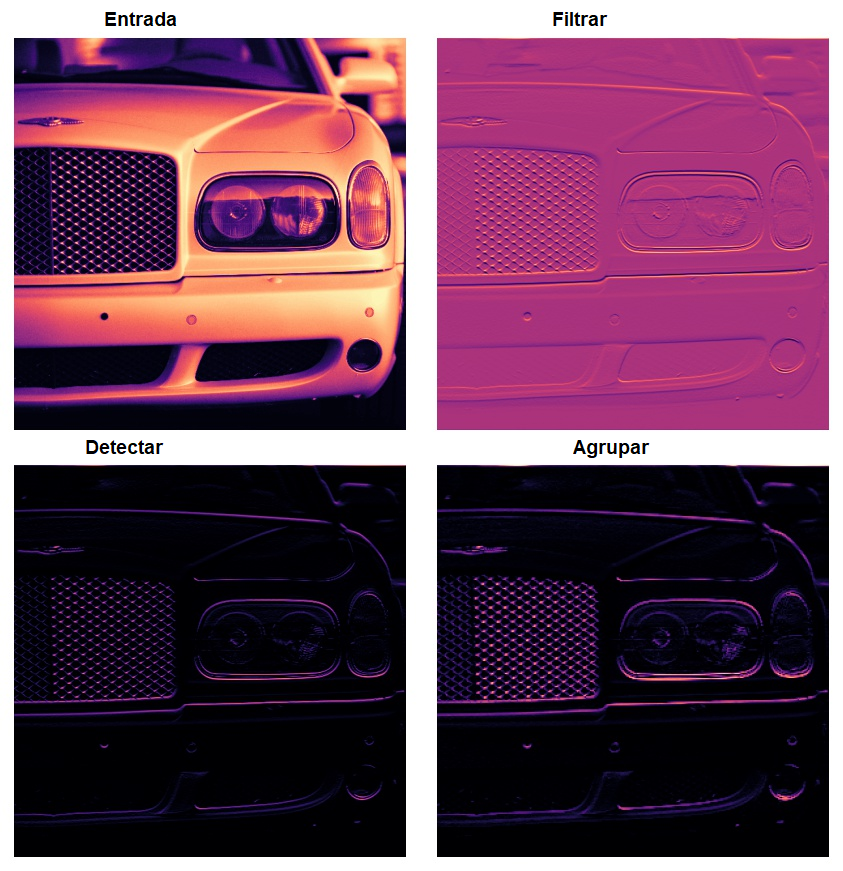

Por lo general, la red realiza varias extracciones de una imagen en paralelo. Es comun en una CNN tener en las capas finales más de 1000 características visuales.

##Filtrar con convolución

Una capa convolucional realiza el paso de filtrado. Se puede definir una capa convolucional en el modelo Keras como:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
    # .... más capas
])

Vamos a explicar los parámetros `kernel_size` y `filters`.

###Pesos

Los **pesos** que una CNN aprende durante el entrenamiento están contenidos en sus capas convolucionales. Estos pesos son llamados **kernels**, que pueden representarse como arreglos:

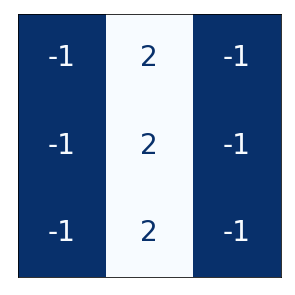

Un kernel opera buscando sobre una imagen y produce una suma pesada de valores de los pixeles, en cierta forma, un kernel actua como un lente enfatizando o des-enfatizando patrones de información

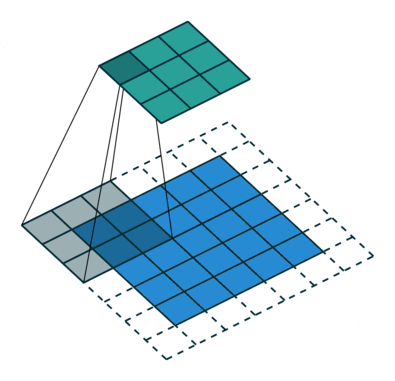

Los kernel definen cómo una capa de convolución está conectada con la siguiente. El kernel de arriba conectará cada neurona de la salida con nueve de la entrada. Al establecer las dimensiones de los kernels en `kernel_size`, se le indica a la CNN cómo formar estas conexiones. En la mayoría de los casos un kernel tiene un número impar de dimensiones, pe., `kernel_size = (3,3) o (5,5)` de tal forma que un pixel este en el centro, pero no es un requerimiento.

Los kernels en una CNN determinan qué clase de características se crean. Durante el entrenamiento, una CNN intenta aprender qué características necesita para resolver el problema de clasificacion. Eso es, encontrar los mejores valores para los kernels.

###Activaciones

A las activaciones en la red se les llama **feature maps**. Son el resultado de aplicar un filtro a una imagen; contienen las características visuales que extrae el kernel. 

Se muestran algunos kernel y los features maps que producen.


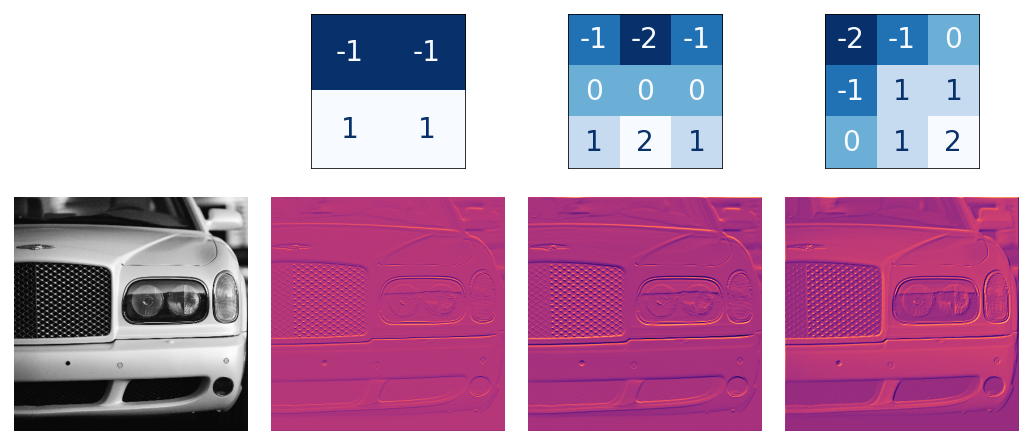

Con los patrones de números en el kernel se crean diferentes clases de features maps. Por lo geneal, lo que una convolución acentúa de la entrada se mapeará en la forma de números positivos en el kernel. Por ejemplo, los kernels izquierdo y de enmedio, acentúan las formas horizontales.

Con el parámetro `filters`, se le indica a la capa convolucional cuántos feature maps se desean crear como salida.

##Detección con ReLU

Después del filtrado, los features maps pasan a través de la capa de activación. La función **rectifier** tiene una gráfica como la siguiente:

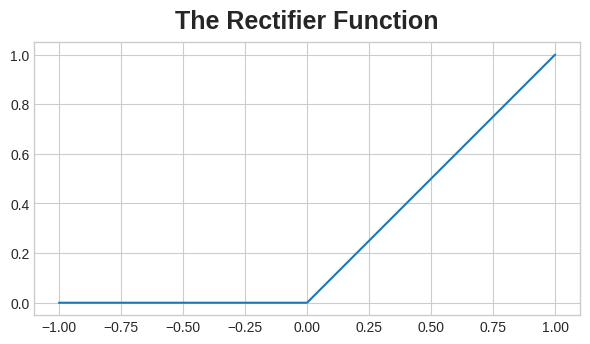

Es como una línea con la parte negativa "rectificada" con 0.

Una neurona con una rectificación agregada se conoce como *rectified linear unit*. Por eso se le llama activación o función ReLU.

La activación ReLU puede definirse como una capa `Activation`, pero por lo general se incluye como función de activación en una `Conv2D`.

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    # .... más capas
])

La función de activación se puede pensar como una calificación de los valores de los pixeles de acuerdo con alguna medida de importancia. La activación ReLU indica que los valores negativos no son importantes por lo que les asigna 0. ("Todo lo no importante es igual a no importante").

En la figura siguiente se aplicó ReLU al feature map anterior.

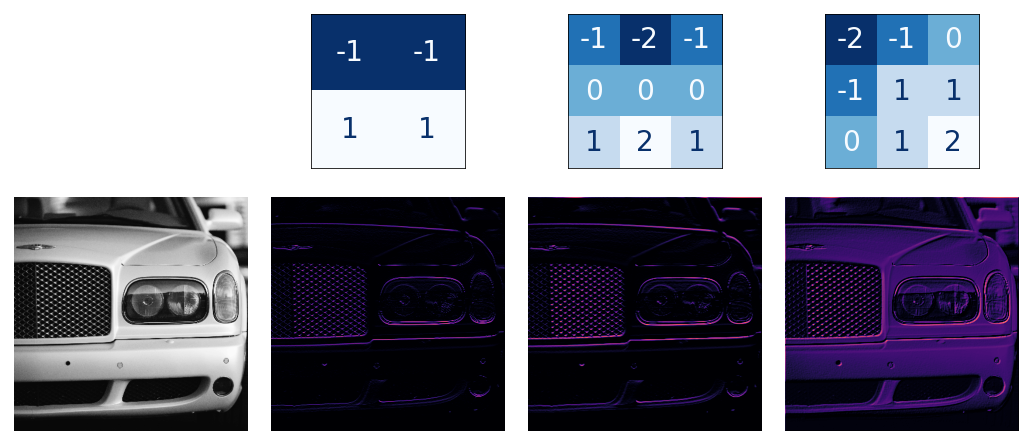

Igual que otras funciones de activación, la función ReLU es nolineal. Esto significa, escencialmente, que el efecto total de todas las capas se vuelve diferente a lo que se obtendría sumando los efectos en una sola capa. La no linealidad, asegura que las características serán combinadas en formas interesantes conforme se mueven a capas más profundas de la red.

##Ejemplo- Aplicación de Convolución y ReLU

Realizaremos una extracción

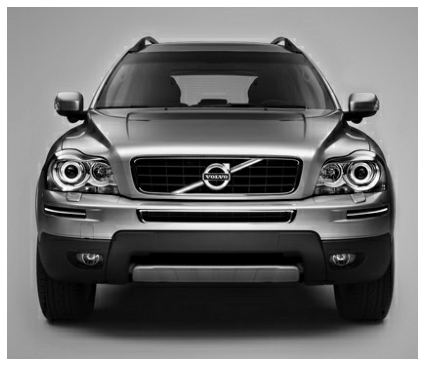

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '/content/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

Para el paso de filtrado, definiremos un kernel y se aplicará en la convolución. El kernel es un "detector de ángulos". Se puede definir con `tf.constant` igual que un arreglo Numpy con `np.array`. Esto crea un **tensor** que usa `TensorFlow`.

In [ ]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])
tf.print(kernel)

[[-1 -1 -1]
 [-1 8 -1]
 [-1 -1 -1]]


TensorFlow incluye muchas de las operaciones que realizan las NN en el [módulo tf.nn](https://www.tensorflow.org/api_docs/python/tf/nn), las dos que usamos fueron conv2D y relu.

A continuación se adaptan algunas cosas para hacerlas compatibles con TensorFlow.

In [ ]:
# Reformatear para compatibilidad batch 
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

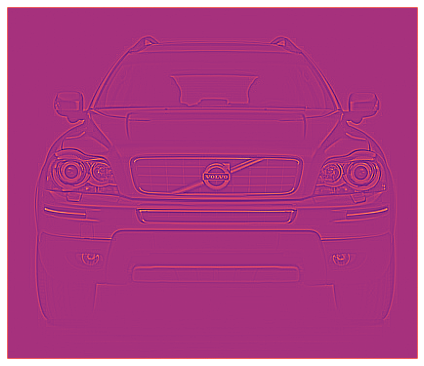

In [ ]:
#se aplica el kenel

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # se verán más adelante
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

Sigue el paso de detección con la función ReLU

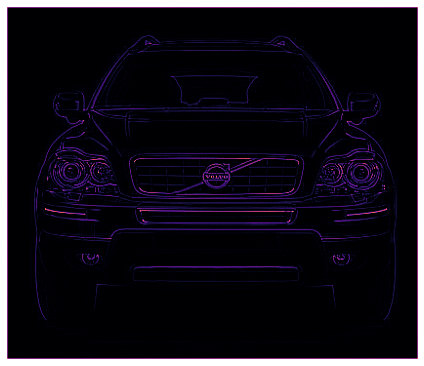

In [ ]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

Hemos creado un feature map.

Estas imágenes como estás usa el head para resolver el problema de clasificación. Podemos imaginar que ciertas características son más de Coches que de camionetas. La tarea de una CNN durante el entrenamiento es crear kernels que encuentren esas características.

##Ejercicio

Practicar extracción de características

**Aplicar transformaciones**

Cargar y leer el archivo car_illus.jpg

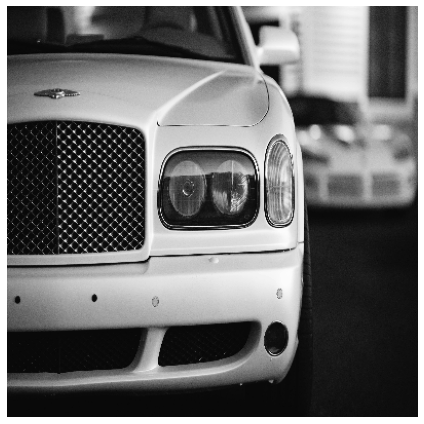

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

imag = tf.squeeze(image).numpy ()
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

Algunos kernels estándar son los siguientes:

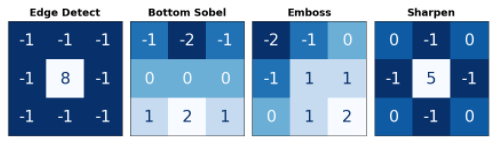

Definir los kernels anteriores y uno más que quiera probar (En general la suma de los números debe estar entre 0 y 1, aunque esto no es necesario)


In [ ]:
kernel = tf.constant([
    ---
])

Poner los kernels en un arreglo y aplicarlos a la imagen. Muestre las 5 figuras juntas para que se aprecien las diferencias

Aplicar la función ReLU a las 5 figuras anteriores.